In [2]:
import pandas as pd
import numpy as np
import sys
sys.path.append("src")   #Para poder indicar la ruta relativa y hacer la importacion
import funciones_analisis as fa
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

In [3]:
df1 = pd.read_csv('./bbdd_iniciales/Customer Flight Activity.csv')
df2 = pd.read_csv('./bbdd_iniciales/Customer Loyalty History.csv')

## Analizo el csv de Customer Flight Activity (DF1)

In [4]:
df1.head(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
5,100301,2017,1,0,0,0,0,0.0,0,0
6,100364,2017,1,0,0,0,0,0.0,0,0
7,100380,2017,1,0,0,0,0,0.0,0,0
8,100428,2017,1,6,0,6,606,60.0,0,0
9,100504,2017,1,0,0,0,0,0.0,0,0


### Dimensión y estructura
-  405,624 filas y 10 columnas.

- Todas las columnas tienen el tipo de dato correcto: la mayoría son enteros (int64), excepto "Points Accumulated" que es float64.

- Se observa que muchas filas tienen "Total Flights", "Distance" y "Points Accumulated" con valor 0. Esto sugiere que hay registros generados para ciertos meses donde el cliente no realizó vuelos.

- "Points Redeemed" y "Dollar Cost Points Redeemed" tienen valores muy bajos en general, lo cual puede reflejar que muchos clientes no canjean sus puntos o no acumulan suficiente para hacerlo.

- Las variables "Year" y "Month" confirman que los datos abarcan los 12 meses de 2017 y 2018.

In [5]:
fa.exploracion_basica(df1)

=== EXPLORACIÓN BÁSICA DEL DATASET ===

Primeras filas:
   Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
0          100018  2017      1               3                        0   
1          100102  2017      1              10                        4   
2          100140  2017      1               6                        0   
3          100214  2017      1               0                        0   
4          100272  2017      1               0                        0   

   Total Flights  Distance  Points Accumulated  Points Redeemed  \
0              3      1521               152.0                0   
1             14      2030               203.0                0   
2              6      1200               120.0                0   
3              0         0                 0.0                0   
4              0         0                 0.0                0   

   Dollar Cost Points Redeemed  
0                            0  
1                       

No se han encontrado valores nulos en la bbdd

In [6]:
fa.identificar_nulos(df1)

=== COLUMNAS CON VALORES NULOS ===
No se encontraron valores nulos en el dataset.


### Conclusiones de valores duplicados
Se identificaron 1,864 filas completamente duplicadas. Esto puede deberse a un error de ingreso en la base de datos

In [7]:
##TENGO QUE ELIMINAR DUPLICADOS##

In [8]:
fa.detectar_duplicados(df1)

Filas duplicadas completas en el dataset: 1864
Aquí tienes las filas duplicadas:
        Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
42              101902  2017      1               0                        0   
227             112142  2017      1               0                        0   
478             126100  2017      1               0                        0   
567             130331  2017      1               0                        0   
660             135421  2017      1               0                        0   
1035            156031  2017      1               0                        0   
1336            106509  2017      1               0                        0   
1348            106509  2017      2               0                        0   
1420            106509  2017      3               0                        0   
1458            106509  2017      4               0                        0   
1491            106509  2017      5    

In [9]:
fa.resumen_medidas(df1)

=== MEDIA, MEDIANA Y MODA DE VARIABLES NUMÉRICAS ===

Columna: Loyalty Number
  Media: 550037.87
  Mediana: 550834.0
  Moda: 678205

Columna: Year
  Media: 2017.50
  Mediana: 2017.5
  Moda (varias): [2017, 2018]

Columna: Month
  Media: 6.50
  Mediana: 6.5
  Moda (varias): [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

Columna: Flights Booked
  Media: 4.12
  Mediana: 1.0
  Moda: 0

Columna: Flights with Companions
  Media: 1.03
  Mediana: 0.0
  Moda: 0

Columna: Total Flights
  Media: 5.15
  Mediana: 1.0
  Moda: 0

Columna: Distance
  Media: 1208.88
  Mediana: 488.0
  Moda: 0

Columna: Points Accumulated
  Media: 123.69
  Mediana: 50.0
  Moda: 0.0

Columna: Points Redeemed
  Media: 30.70
  Mediana: 0.0
  Moda: 0

Columna: Dollar Cost Points Redeemed
  Media: 2.48
  Mediana: 0.0
  Moda: 0


## Analisis CSV Customer Loyalty History (DF2)

In [10]:
df2.head(10)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
5,193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.0,Married,Star,3844.57,Standard,2012,5,NaN,NaN
6,927943,Canada,Ontario,Toronto,P5S 6R4,Female,College,NaN,Single,Star,3857.95,Standard,2014,6,NaN,NaN
7,188893,Canada,Ontario,Trenton,K8V 4B2,Male,Bachelor,100159.0,Married,Star,3861.49,Standard,2016,12,NaN,NaN
8,852392,Canada,Quebec,Montreal,H2Y 2W2,Female,Bachelor,100159.0,Married,Star,3861.49,Standard,2015,5,NaN,NaN
9,866307,Canada,Ontario,Toronto,M8Y 4K8,Male,Bachelor,100159.0,Married,Star,3861.49,Standard,2016,10,NaN,NaN


  Dimensión y estructura
- Contiene 16737 filas y 16 columnas.

- Encontramos datos demográficos, de fidelización y de comportamiento de clientes.

- Los tipos de datos corresponden

- Se detectan valores de salarios negativos, debemos verificar si es un error de ingreso al valorar el rango promedio de salarios 

In [11]:
fa.exploracion_basica(df2)

=== EXPLORACIÓN BÁSICA DEL DATASET ===

Primeras filas:
   Loyalty Number Country          Province       City Postal Code  Gender  \
0          480934  Canada           Ontario    Toronto     M2Z 4K1  Female   
1          549612  Canada           Alberta   Edmonton     T3G 6Y6    Male   
2          429460  Canada  British Columbia  Vancouver     V6E 3D9    Male   
3          608370  Canada           Ontario    Toronto     P1W 1K4    Male   
4          530508  Canada            Quebec       Hull     J8Y 3Z5    Male   

  Education    Salary Marital Status Loyalty Card      CLV Enrollment Type  \
0  Bachelor   83236.0        Married         Star  3839.14        Standard   
1   College       NaN       Divorced         Star  3839.61        Standard   
2   College       NaN         Single         Star  3839.75        Standard   
3   College       NaN         Single         Star  3839.75        Standard   
4  Bachelor  103495.0        Married         Star  3842.79        Standard   

   Enr

Reviso los valores nulos:

- La columna "Salary" tiene valores nulos en aproximadamente 25% de los registros (solo 12,499 de 16,737 tienen datos).

- Las columnas "Cancellation Year" y "Cancellation Month" tienen valores nulos en más del 85 % de las filas, lo que indica que la mayoría de los clientes no ha cancelado la afiliación al programa. Lo que indica a la empresa una buena fidelización y permanencia de clientes al programa.

In [12]:
fa.identificar_nulos(df2)

=== COLUMNAS CON VALORES NULOS ===
Salary                 4238
Cancellation Year     14670
Cancellation Month    14670
dtype: int64


In [13]:
fa.detectar_duplicados(df2)

Filas duplicadas completas en el dataset: 0


### Frecuencias de variables categóricas

- Todos los clientes pertenecen a Canadá, y las provincias más representadas son Ontario (5.404 registros), British Columbia (4.409) y Quebec (3.300).

- Las ciudades más frecuentes son Toronto, Vancouver y Montreal, lo que indica una mayor concentración de clientes en zonas urbanas.

- La distribución de género entre afiliaciones se divide casi en partes iguales (mujeres (8.410) y hombres (8.327) ) por lo que no hay una tendencia determinada en cuanto a este punto.

- La mayoría de los clientes tiene estudios de grado universitario (Bachelor) o college, representando más del 87 % del total.


- La mayoría de los clientes se ha casado (9.735), luego siguen los solteros (4.484) y por ultimo los divorciados (2.518), lo que puede indicar una tendencia en la forma en que viajan (solos o en grupo).

- Las tarjetas más comunes son Star (7.637) y Nova (5.671), y en menor proporción Aurora (3.429). Esta información puede ser útil para entender niveles de fidelización o beneficios asociados.

- La gran mayoría de los clientes se inscribieron con el tipo "Standard", mientras que 971 clientes lo hicieron bajo la promoción de 2018.

In [14]:
fa.frecuencias_categoricas(df2)

=== FRECUENCIAS DE VARIABLES CATEGÓRICAS ===

Valores únicos para la columna: COUNTRY
  Country  count
0  Canada  16737

Valores únicos para la columna: PROVINCE
           Province  count
0           Ontario   5404
1  British Columbia   4409
2            Quebec   3300
3           Alberta    969
4          Manitoba    658

Valores únicos para la columna: CITY
        City  count
0    Toronto   3351
1  Vancouver   2582
2   Montreal   2059
3   Winnipeg    658
4   Whistler    582

Valores únicos para la columna: POSTAL CODE
  Postal Code  count
0     V6E 3D9    911
1     V5R 1W3    684
2     V6T 1Y8    582
3     V6E 3Z3    544
4     M2M 7K8    534

Valores únicos para la columna: GENDER
   Gender  count
0  Female   8410
1    Male   8327

Valores únicos para la columna: EDUCATION
              Education  count
0              Bachelor  10475
1               College   4238
2  High School or Below    782
3                Doctor    734
4                Master    508

Valores únicos para la col

In [15]:
fa.resumen_medidas(df2)

=== MEDIA, MEDIANA Y MODA DE VARIABLES NUMÉRICAS ===

Columna: Loyalty Number
  Media: 549735.88
  Mediana: 550434.0
  Moda (varias): [100018, 100102, 100140, 100214, 100272, 100301, 100364, 100380, 100428, 100504, 100550, 100585, 100590, 100642, 100644, 100646, 100727, 100737, 100753, 100816, 100853, 100883, 100890, 101018, 101148, 101356, 101363, 101487, 101515, 101540, 101544, 101547, 101581, 101594, 101644, 101663, 101664, 101709, 101768, 101876, 101895, 101902, 101945, 102168, 102184, 102207, 102299, 102308, 102311, 102376, 102464, 102615, 102726, 102730, 102740, 102788, 102851, 102877, 102982, 103043, 103151, 103217, 103304, 103340, 103352, 103359, 103362, 103383, 103436, 103490, 103502, 103536, 103699, 103731, 103758, 103823, 103860, 103862, 103916, 103969, 103970, 103975, 103985, 104103, 104267, 104353, 104431, 104541, 104586, 104673, 104732, 104739, 104849, 104960, 105063, 105073, 105074, 105145, 105193, 105214, 105251, 105335, 105352, 105552, 105688, 105700, 105712, 105789, 1

## PROCESO DE LIMPIEZA DE DF1 Y DF2

- Antes de unir ambas bbdd necesito corregir los salarios negativos a positivos, y a eliminar duplicados en el DataFrame 1.

In [16]:
#Primero necesitamos ver el rango completo de salarios
df2['Salary'].describe()

count     12499.000000
mean      79245.609409
std       35008.297285
min      -58486.000000
25%       59246.500000
50%       73455.000000
75%       88517.500000
max      407228.000000
Name: Salary, dtype: float64

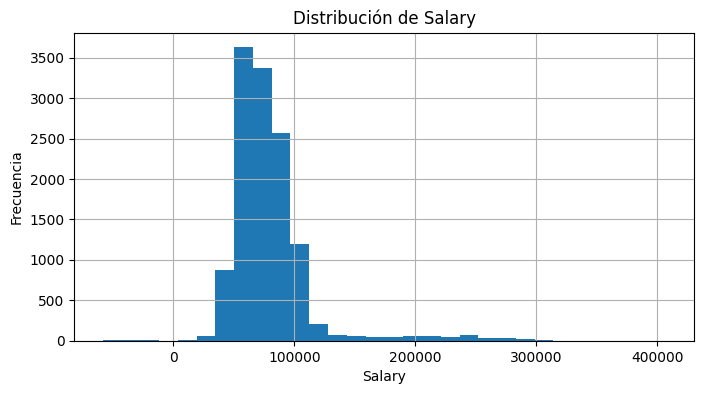

In [17]:
df2['Salary'].hist(bins=30, figsize=(8,4))
plt.title("Distribución de Salary")
plt.xlabel("Salary")
plt.ylabel("Frecuencia")
plt.show()

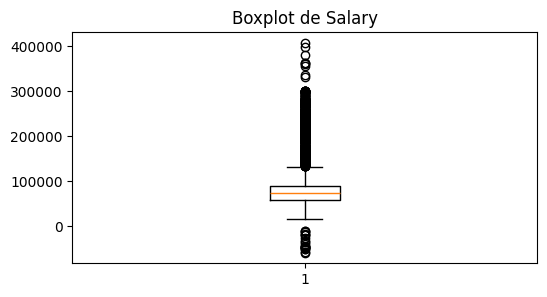

In [18]:
plt.figure(figsize=(6,3))
plt.boxplot(df2['Salary'].dropna())
plt.title("Boxplot de Salary")
plt.show()

In [19]:
# corregimos los salarios negativos a positivos
df2['Salary'] = df2['Salary'].abs()

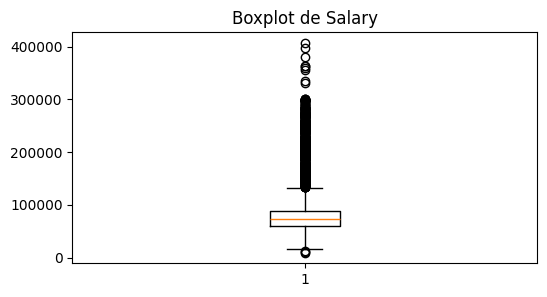

In [20]:
#comprobamos nuevamente el grafico para ver los outliers  y confirmamos que no hay valores -
plt.figure(figsize=(6,3))
plt.boxplot(df2['Salary'].dropna())
plt.title("Boxplot de Salary")
plt.show()

ANALIZO LOS OUTLIERS SUPERIORES PARA VER SI CORRESPONDEN O SON ERRORES DE INGRESO

In [21]:
df2['Salary'].sort_values(ascending=False).head(10)


5557     407228.0
3696     397919.0
10262    381124.0
6240     363189.0
11481    362833.0
4506     359643.0
11902    355375.0
9811     334931.0
6105     330419.0
1167     299953.0
Name: Salary, dtype: float64

In [22]:
df2[df2['Salary'] > 300000].shape

(9, 16)

In [23]:
df2[df2['Salary'] > 300000][['Loyalty Number','Salary']].sort_values('Salary', ascending=False)

,Loyalty Number,Salary
5557,274431,407228.0
3696,457127,397919.0
10262,155964,381124.0
6240,714316,363189.0
11481,745383,362833.0
4506,933053,359643.0
11902,242387,355375.0
9811,905360,334931.0
6105,130032,330419.0


In [24]:
df2.groupby('Education')['Salary'].max().sort_values(ascending=False)

Education
Doctor                  407228.0
Master                  133080.0
Bachelor                105563.0
High School or Below     93875.0
College                      NaN
Name: Salary, dtype: float64

VEMOS QUE LOS VALORES ALTOS SE CORRESPONDEN CON UN NIVEL DE EDUCACION ALTO POR LO QUE TOMAMOS LOS VALORES OUTLIERS COMO CORRECTOS

-------

ELIMINAMOS LAS FILAS DUPLICADAS LUEGO DE ANALIZAR QUE CORRESPONDE CON UN ERROR DE INGRESO YA QUE SE CORRESPONDEN TODOS SUS DATOS.

In [25]:
# comprobamos las filas duplicadas
df1.duplicated().sum()

np.int64(1864)

In [26]:
# las eliminamos
df1 = df1.drop_duplicates()

In [27]:
# volvemos a comprobar
df1.duplicated().sum()

np.int64(0)

## Unión de DF en un único limpio

In [28]:
# unimos los dos dataframes por "Loyalty Number" con un left join para conservar todos los clientes (aunque no hayan volado)
df_merged = pd.merge(df1, df2, on='Loyalty Number', how='left')

In [29]:
# verificamos la unión
df_merged.info()
df_merged.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
 10  Country                      403760 non-null  object 
 11  Province                     403760 non-null  object 
 12  City                         403760 non-null  object 
 13 

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [30]:
# guardamos el nuevo dataframe como CSV para utilizarlo de ahora en adelante
df_merged.to_csv("Loyalty_Program.csv", index=False)
